# (Deep) Neural Networks

It is the easiest if you work on this Notebook in google Colab where you don't need to install tensorflow on your laptop.

+ Google Colab: https://colab.research.google.com/notebooks/welcome.ipynb#recent=true

+ Go to "upload" to open this notebook in Google Colab.

If you would like to install tensorflow on your local machine, run the following code in a notebok cell: `!pip install tensorflow`


## Neural Net with Fashion MNIST 

Our task is to classify images of clothing into 10 classes  using a neural network model. The goal is to get familiar with neural networks applied on real-world datasets.



In [1]:
# load required packages
import tensorflow as tf
from keras import Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation, BatchNormalization
import numpy as np
from tensorflow.keras import utils
import matplotlib.pyplot as plt

### Dataset
We use the Fashion MNIST dataset by Zalando which contains 70,000 grayscale images each assigned one of 10 clothing categories (e.g., Top, Trouser, Sneaker, ...). The images show individual clothing articles at low resolution (28 by 28 pixels). The dataset is available as tensorflow dataset.

We take the split that comes with the dataset where 60,000 images are used to train the network and 10,000 images to evaluate its prediction performance. 

In [2]:
# load the training and test data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



# names of class labels (we have ten classes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

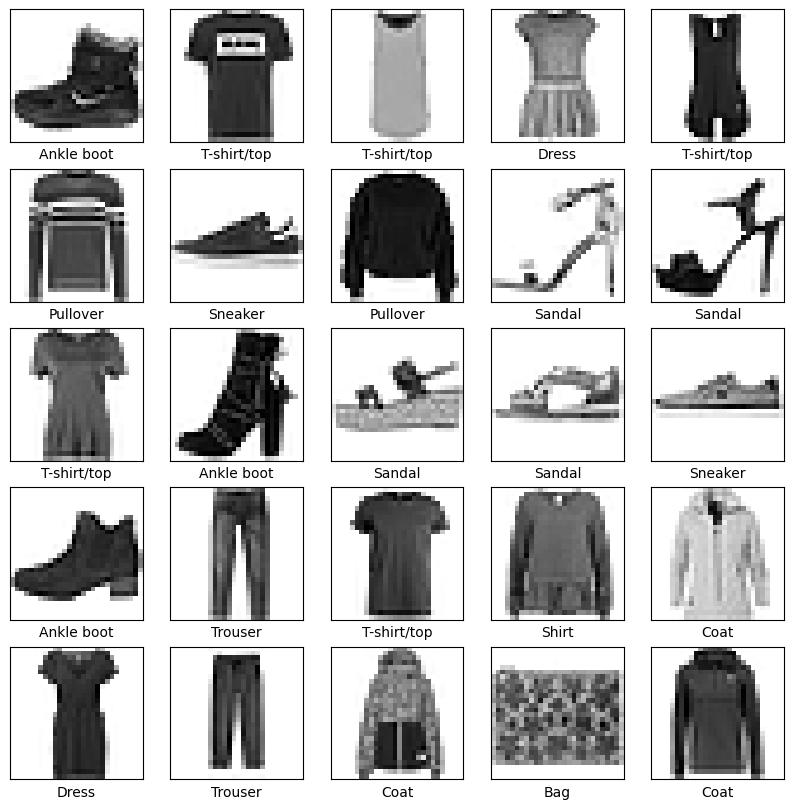

In [3]:
# to give you an overview of the data plot first 25 images with corresponding labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Put the datasets in the necessary shapes (dimensionality) and check this.

In [4]:
print("shape for training (x) data : ", train_images.shape)  # should be: 60'000 Images each with 28x28 pixels
print("shape for training (y) data : ", train_labels.shape)  # 60'000 Labels with 10 classes
print("shape for test (x) data     : ", test_images.shape)  # 10'000 Images with 28x28 pixels
print("shape for test (y) data     : ", test_labels.shape)  # 10'000 Labels with 10 classes

shape for training (x) data :  (60000, 28, 28)
shape for training (y) data :  (60000,)
shape for test (x) data     :  (10000, 28, 28)
shape for test (y) data     :  (10000,)


### Design the Deep Neural Network
The goal here is to deisgn a convolutional neural network for classifying clothing images in ten clothing categories. The first and the last layer of the network are given. It is your choice how deep or complex you want to build your neural network. 

Here are some possible layers you could use:
+ `Flatten()` https://keras.io/api/layers/reshaping_layers/flatten/ 
+ `Dense()` (specify a activation function i.e. use the argument, `activation=...`) https://keras.io/api/layers/core_layers/dense/
+ `Dropout()` https://keras.io/api/layers/regularization_layers/dropout/
+`BatchNormalization` https://keras.io/api/layers/normalization_layers/batch_normalization/
+ `Conv2D()` (specify a activation function i.e. use the argument, `activation=...`)  https://keras.io/api/layers/convolution_layers/convolution2d/
+ `MaxPooling2D()` https://keras.io/api/layers/pooling_layers/max_pooling2d/

*Hint:* Consider that for using the Conv2D model we need to reshape the training and test images to (60000, 28, 28, **1**) and (10'000, 28, 28, **1**), respectively!

In [5]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_description = 'Input -> Conv2D filter=32,kernel_s=4, str=1-> ReLU -> MaxPool2D s=2 -> Flatten -> Dense -> Softmax'
# print a summary of your model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        77,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,194 (520.29 KB)

 Trainable params: 133,194 (520.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model
Compile and train the model you designed. 

You can also adapt the `batch_size`, the number of epochs `epochs` and the optimizer used in the training process.


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.7573 - loss: 1.2766 - val_accuracy: 0.8867 - val_loss: 0.3202
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.8871 - loss: 0.3128 - val_accuracy: 0.8997 - val_loss: 0.2861
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9044 - loss: 0.2650 - val_accuracy: 0.8993 - val_loss: 0.2922
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9188 - loss: 0.2242 - val_accuracy: 0.9050 - val_loss: 0.2665
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9234 - loss: 0.2095 - val_accuracy: 0.9102 - val_loss: 0.2610
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9333 - loss: 0.1837 - val_accuracy: 0.9133 - val_loss: 0.2611
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9363 - loss: 0.1714 - val_accuracy: 0.9082 - val_loss: 0.2635
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9419 - loss: 0.1591 - 

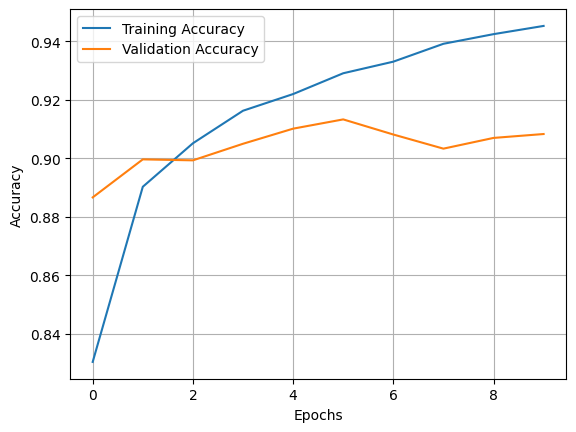

In [6]:
# compile model
# you can modify the parameter optimizer with different optimization methods
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# specify batch size for the optimization (mini-batch)
batch_size = 128
# specify the number of epochs
epochs = 10

# fit model to train data
# we use 10% of the data as validation set
# you can add more 'iterations' by raising the parameter epochs
log = model.fit(train_images,
                train_labels,
                batch_size=128,
                epochs=10,
                validation_split=0.1
                )

# plot accuracy per epoch
plt.plot(log.history['accuracy'], label='Training Accuracy')
plt.plot(log.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()


### Evaluate the model on the test dataset


In [7]:
# compute the loss and accuracy
test_scores = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

# you can also make predictions for the test data
predictions = model.predict(test_images)

Test loss: 0.3098040819168091
Test accuracy: 0.9114000201225281
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


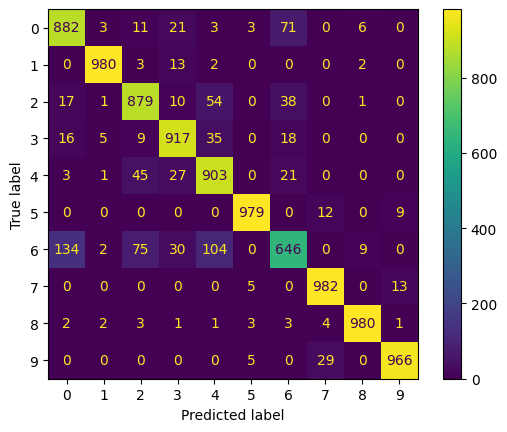

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get the maximum probability class
max_probability_predictions = np.argmax(predictions, axis=1)
# compute and display the confusion matrix
conf_mat = confusion_matrix(test_labels, max_probability_predictions)
conf_mat = ConfusionMatrixDisplay(conf_mat)

conf_mat.plot()

The cell below visualizes the some example images from the test set along with their true labels and the model predictions. 

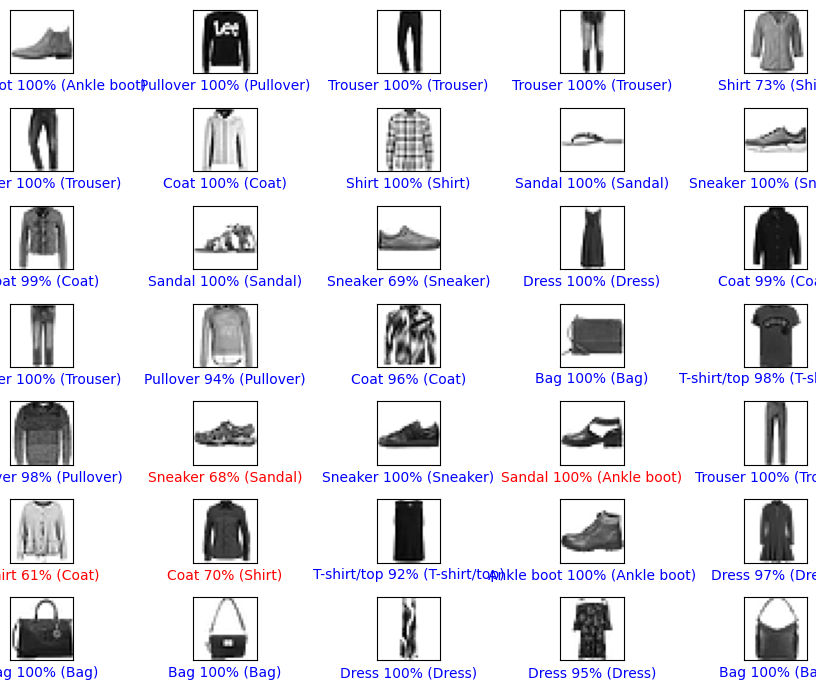

In [9]:
# This function plots the first n predictions with their true label (in brackets) and image
test_images = test_images.reshape(10000, 28, 28)


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


# plot prediction and image
num_rows = 7
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 1 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()